<a href="https://colab.research.google.com/github/Jamunajayanna/DataScience/blob/main/Heart1DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")

# Define column names as the dataset does not have headers
df.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
              "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

In [4]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


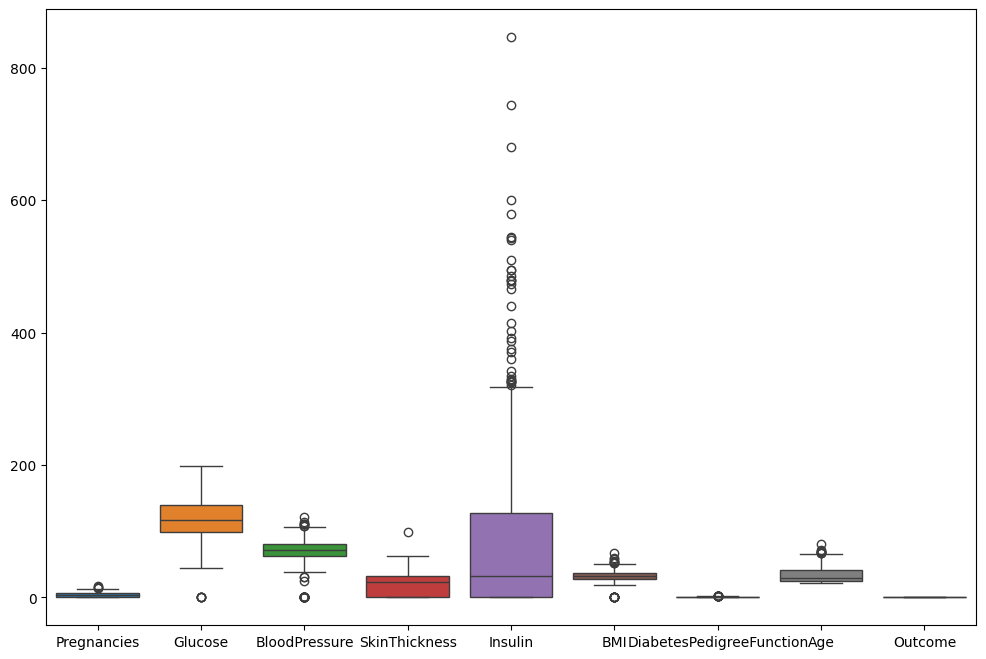

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()

In [7]:
def cap_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Define num_cols to include all numerical features
num_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

df_capped = cap_outliers(df, num_cols)

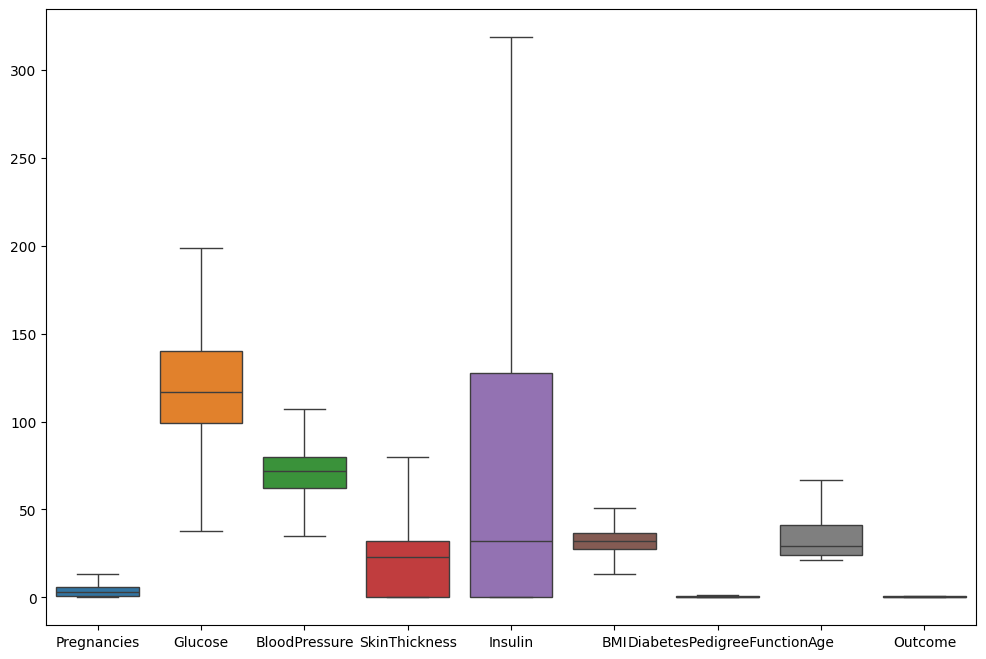

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()

In [9]:

# Define features and target
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save trained model & scaler
with open("diabetes_model.pkl", "wb") as model_file:
    pickle.dump(clf, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model trained and saved successfully!")


Model trained and saved successfully!


In [10]:
from google.colab import files

files.download("diabetes_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy Score: 0.68
Confusion Matrix:
 [[70 27]
 [23 34]]


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions on test data
y_pred = best_clf.predict(X_test_scaled)

# Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Score: 0.76
Confusion Matrix:
 [[78 19]
 [18 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        97
           1       0.67      0.68      0.68        57

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [12]:
!pip install gradio

In [13]:
import gradio as gr

# Load the trained model
with open("diabetes_model.pkl", "rb") as model_file:
    clf = pickle.load(model_file)

with open("scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    user_input = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
    user_input = scaler.transform(user_input)
    predicted = clf.predict(user_input)
    return "Likely to have diabetes." if predicted[0] == 1 else "Unlikely to have diabetes."

# Launch Web GUI
gr.Interface(
    fn=predict_diabetes,
    inputs=[gr.Number(label="Pregnancies"), gr.Number(label="Glucose"), gr.Number(label="Blood Pressure"),
            gr.Number(label="Skin Thickness"), gr.Number(label="Insulin"), gr.Number(label="BMI"),
            gr.Number(label="Diabetes Pedigree Function"), gr.Number(label="Age")],
    outputs="text",
    title="Diabetes Prediction",
    description="Enter patient data to predict diabetes risk."
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8b3855d7a6d521c12d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
